# 카이제곱 검정 
: 두 범주형 변수가 서로 상관이 있는지 판단하는 통꼐적 검정방법
예) 학력, 성별, 직업의 만족도

### 아동별 장남감 보유 현황 
- 귀무가설 : 설정한 가설이 진실할 확률이 극히 적어 처음부터 버릴 것이 예상되는 가설
- child1과 child2의 장난감 보유수에 대한 만족도는 차이가 없다.
- 대립가설 : 귀무가설이 기각될 때 받아들여지는 가설
- child1과 child2의 장난감 보유수에 대한 만족도는 차이가 있다.

In [2]:
# 장난감 보유 현황
child1 <- c(5,11,1)
child2 <- c(4,7,3)

In [3]:
# 분석을 위한 데이터 합치기 
Toy <- cbind(child1,child2)
Toy

child1,child2
5,4
11,7
1,3


In [4]:
# 장난감 종류
rownames(Toy) <- c("car","truck","doll")
Toy

,child1,child2
car,5,4
truck,11,7
doll,1,3


In [5]:
# 카이제고 검정 실시
# p-value:유의 수준 
chisq.test(Toy)

Warning message in chisq.test(Toy):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Toy
X-squared = 1.7258, df = 2, p-value = 0.4219


### 결론
p-value = 0.4219 > 0.05 (95% 신뢰구간) -> 귀무가설 채택 
> child1과 child2의 데이터는 통계적으로 큰 차이가 없다.

p-value는 0에 가까울수록 신뢰도가 높다. 미리 정해진 유의수준(일반적으로 0.05)보다 작으면 대립가설을 채택하고 유의수준보다 크면 귀무가설을 채택.

In [6]:
#상관계수
#쌍둥이 데이터로 굉장히 비슷해서 분석의 의미 없다. 
cor(child1,child2)

[1] 0.9862414

### 메세지 : 카이제곱의 근사값이 정확하지 않을수도 있다.
- 데이터량이 적은 경우 발생

---
# 피셔검정

In [7]:
#데이터양이 적을 때
fisher.test(Toy)


	Fisher's Exact Test for Count Data

data:  Toy
p-value = 0.5165
alternative hypothesis: two.sided


In [8]:
p-value = 0.5165 > 0.05 -> 귀무가설

ERROR: Error in p - value = 귀무가설 <- 0.5165 > 0.05: 객체 'p'를 찾을 수 없습니다


---
# t- 검정

- 모집단의 분산이나 표준편차를 알지 못할 때
모집단을 대표하는 표본으로부터 추정된 분산이나 표준편차를 가지고 검정하는 방법으로
“두 모집단의 평균간의 차이는 없다”라는 귀무가설과 “두 모집단의 평균 간에 차이가 있다”라는 대립가설 중에 하나를 선택할 수 있도록 하는 통계적 검정방법이다.

In [ ]:
# 귀무가설 : 건전지의 수명은 1000시간이다(분석 필요 X)
# 대립가설 : 건전지의 수명은 1000시간이 아니다.(분석 O)

In [ ]:
bat <- c(980,1000,968,1032,1012,1002,996,1017)

In [ ]:
# 데이터의 분포가 정규분표인지 확인 -> Shapiro-wilk 검정
# 귀무가설: 자료가 정규분포를 따른다. 
# 대립가설: 자료가 정규분포를 따르지 않는다. 

In [ ]:
# 정규 분포 확인 
shapiro.test(bat)


	Shapiro-Wilk normality test

data:  bat
W = 0.98289, p-value = 0.9758


In [ ]:
 p-value = 0.9758 > 0.05 -> 귀무가설

In [ ]:
# t- 검정실시
t.test(bat, mu=1000,alternative="two.sided")

# mu : 비교하는 대상의 평균 
# alternattive 
# - two.sided : 데이터가 평균과 다르다. 
# - greater : 데이터가 평균과 크다. 
# - less : 데이터가 평균과 적다.



	One Sample t-test

data:  bat
t = 0.1217, df = 7, p-value = 0.9066
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  983.8737 1017.8763
sample estimates:
mean of x 
 1000.875 


In [ ]:
p-value = 0.9066 > 0.05 --> 귀무가설 :건전지의 수명은 1000시간이다

---

In [11]:
exam <- read.csv("../Data/exam.csv")
head(exam)

no,score
1,58
2,49
3,39
4,99
5,32
6,88


In [ ]:
str(exam)

'data.frame':	17 obs. of  2 variables:
 $ no   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ score: int  58 49 39 99 32 88 62 30 55 65 ...


In [ ]:
# 어떤 학급의 수학 점수 평균 : 55점
# 가설 : 0교시 수업을 한 후에 학생들의 성적이 올랐을끼?
# 귀무가설 : 성적이 오르지 않았다.
# 대립가설 : 성적이 올랐다. 

In [12]:
a <-exam$score

In [ ]:
# 정규 분포 확인 
shapiro.test(a)


	Shapiro-Wilk normality test

data:  a
W = 0.91143, p-value = 0.1058


In [ ]:
 p-value = 0.1058 > 0.05 -> 귀무가설 

In [ ]:
mean(a)

[1] 56.17647

In [ ]:
summary(a)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.00   42.00   55.00   56.18   62.00   99.00 

In [ ]:
t.test(exam$score, mu= 55,alternative="greater")                 #mu 비교대상의 중간값 


	One Sample t-test

data:  exam$score
t = 0.24546, df = 16, p-value = 0.4046
alternative hypothesis: true mean is greater than 55
95 percent confidence interval:
 47.80855      Inf
sample estimates:
mean of x 
 56.17647 


In [ ]:
p-value = 0.4046 > 0.05 -> 귀무가설 : 0교시 수업 후 성적이 오르지 않았다. 

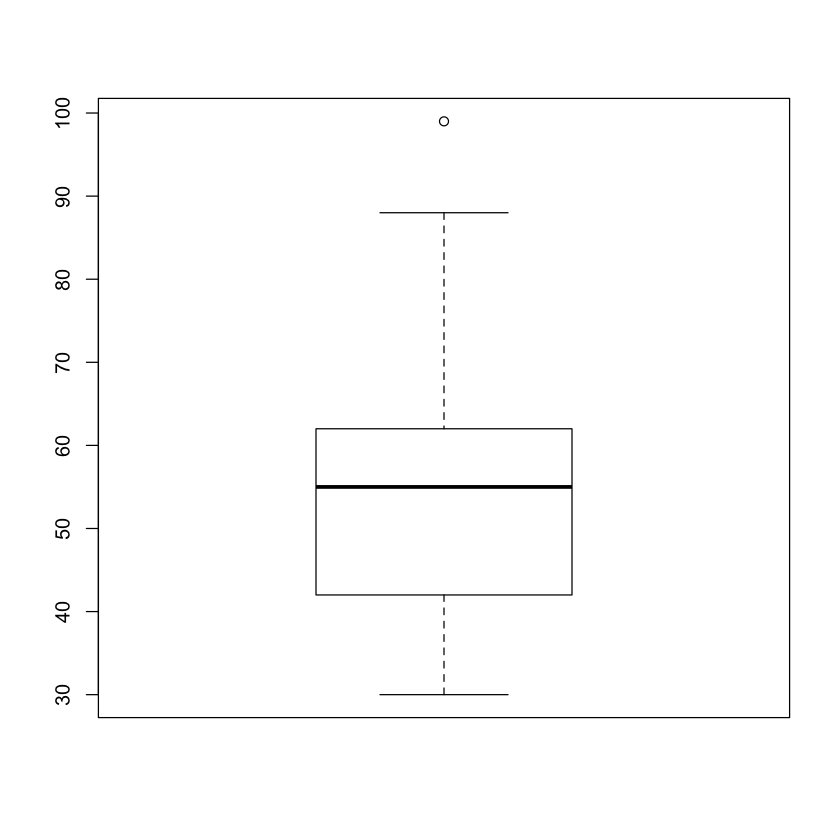

In [13]:
par(bg='white')
boxplot(a)          #평균은 오르지만 성적이 오르지 않았다.

---

In [ ]:
# 표본이 2개인 t - 검정
# 귀무가설 : 복용 전후의 차이가 없다.
# 대립가설 : 복용 전후의 차이가 있다. 

In [ ]:
preMedicine <- read.csv("../Data/preMedicine.csv")
postMedicine <- read.csv("../Data/postMedicine.csv")

In [ ]:
head(preMedicine)

no,data
1,13.2
2,8.2
3,10.9
4,14.3
5,10.7
6,6.6


In [ ]:
head(postMedicine)

no,data
1,14.0
2,8.8
3,11.2
4,14.2
5,11.8
6,6.4


In [ ]:
str(preMedicine)

'data.frame':	10 obs. of  2 variables:
 $ no  : int  1 2 3 4 5 6 7 8 9 10
 $ data: num  13.2 8.2 10.9 14.3 10.7 6.6 9.5 10.8 8.8 13.3


In [ ]:
str(postMedicine)

'data.frame':	10 obs. of  2 variables:
 $ no  : int  1 2 3 4 5 6 7 8 9 10
 $ data: num  14 8.8 11.2 14.2 11.8 6.4 9.8 11.3 9.3 13.6


In [ ]:
pre <- preMedicine$data
post <- postMedicine$data

In [ ]:
t.test(pre,post,alternative = "two.sided")


	Welch Two Sample t-test

data:  pre and post
t = -0.36891, df = 17.987, p-value = 0.7165
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.745046  1.925046
sample estimates:
mean of x mean of y 
    10.63     11.04 


In [ ]:
p-value = 0.7165 > 0.05 -> 귀무가설

---
# 상관계수

In [ ]:
y <- c(1,2,3,4)             # 순서에 따라 상관계수가 달라짐 
z <- c(0,7,5,9)

cor(y,z)

[1] 0.8356578

In [ ]:
# 피어슨 상관계수 
cor( y,z, method = "pearson")       #default= pearson , 상관계수와 동일하게 나옴 

[1] 0.8356578

In [ ]:
# 스피어맨 상관계수 ,데이터가 넘지 않을때 스피어맨 상관계수가 유효하다 
cor( y,z, method = "spearman")       

[1] 0.8

---
# 콜모고로프-스미노프 검정(KS Test)
: 주어진 2개의 데이터가 같은 분포를 이루는지 검정하는 것 

In [ ]:
# 귀무가설 : 두개의 데이터의 분포가 다르다
# 대립가설 : 두개의 데이터의 분포가 같다

In [ ]:
x <- rnorm(50)
y <- runif(50)
options(scipen = 100)
ks.test(x,y )


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.48, p-value = 0.00001387
alternative hypothesis: two-sided


In [ ]:
 p-value = 0.00001387 < 0.05 --> 대립가설

---
# 부호검정
: 2개의 데이터 사이에 차이가 있는지 검정하는 것

In [15]:
# 식사전과 식사후의 음료수 맛에 대한 평가
x <- c(4,1,1,4,3,3,2,5,3,3)       #식사 전의 음료수 맛에 대한 평가 점수, 만점 5점
y <- c(1,1,3,2,5,1,4,4,3,1)       #식사 후의 음료수 맛에 대한 평가 점수

In [ ]:
# 귀무가설 : 유의한 차이가 없다
# 대립가설 : 유의한 차이가 있다

In [ ]:
# 음료수 맛는 식사 전과 식사후의 차이가 없어야 함 ,귀무가설

In [16]:
# 부호검정 
binom.test(c(length(x[x>y]),length(x[x<y])))


	Exact binomial test

data:  c(length(x[x > y]), length(x[x < y]))
number of successes = 5, number of trials = 8, p-value = 0.7266
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2448632 0.9147666
sample estimates:
probability of success 
                 0.625 


In [ ]:
p-value = 0.7266 > 0.05 --> 귀무가설

In [ ]:
length(x[x>y])
length(x[x<y])

[1] 5

[1] 3

---
# 비율 검정
: 2갸의 데이터 사이에 비율의 차이가 있는지에 대한 것을 검정 

In [ ]:
# 맥주를 좋아하시나요? 라는 질문에 서울에서는 400명중에 360명, 부산에서는 200명 중에 136명이 좋아한다고 답했다면 
# 둘의 비율 차이가 있다고 할 수 있는가?

# 귀무가설 : 유의한 차이가 없다
# 대립가설 : 유의한 차이가 있다

In [ ]:
hite <- c(360,136)              #하이트 맥주를 선호하는 수
sample <- c(400,200)            # 전체 집단

prop.test(hite, sample)


	2-sample test for equality of proportions with continuity correction

data:  hite out of sample
X-squared = 43.515, df = 1, p-value = 0.00000000004207
alternative hypothesis: two.sided
95 percent confidence interval:
 0.14523 0.29477
sample estimates:
prop 1 prop 2 
  0.90   0.68 


In [ ]:
(유의수준)p-value = 0.00000000004207  < 0.05 --> 대립가설: 유의미한 차이가 있다. 
(지역별로 선호도가 달라 맥주맛을 다르게 출시 가능)
# 코카콜라의 맛은 나라별로 실제로 다르다 